In [1]:
# data augumentation is studied for cover cnn,because cnn is not working some features of a data.
# data augumentation is work with image size,image thickness ,rotation image brightness,contrasting images and zoom in and zoom out images.

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import cv2
import os
import PIL

# Read Data

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url,untar=True,cache_dir='.')

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
data_path = pathlib.Path(data_dir)

In [7]:
data_path

WindowsPath('datasets/flower_photos')

In [8]:
#  access all folders in a flower folder
data_path.glob("*/*.jpg")

<generator object Path.glob at 0x000001D11F50F560>

In [9]:
# data are access in list
list(data_path.glob("*/*.jpg"))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [10]:
# Find a length of list
len(list(data_path.glob("*/*.jpg")))

3670

In [11]:
roses = list(data_path.glob("roses/*.jpg"))
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [12]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [13]:
len(roses)

641

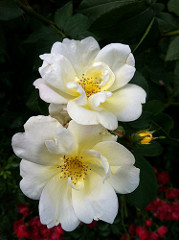

In [14]:
#  see an image using pillow library
PIL.Image.open(roses[0])

# dictionary

In [15]:
flowers_names = {'roses':0,
                'daisy':1,
                'dandelion':2,
                'sunflowers':3,
                'tulips':4}

In [16]:
flowers_images_dict ={'roses' : list(data_path.glob("roses/*")),
'daisy' : list(data_path.glob("daisy/*")),
'dandelion' : list(data_path.glob("dandelion/*")),
'sunflowers' : list(data_path.glob("sunflowers/*")),
'tulips' : list(data_path.glob("tulips/*"))
                    }

In [17]:
for i in flowers_images_dict:
    print(i, ":", flowers_images_dict[i])

roses : [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flower_photos/roses

In [18]:
# access a single sample
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img.shape

(240, 179, 3)

In [21]:
# resize the image
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
# function for image reading as well as resize image
X,y = [], []
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(180,180))
        X.append(resized)
        y.append(flowers_names[flower_name])

In [23]:
X[123].shape

(180, 180, 3)

In [24]:
type(X)

list

In [25]:
type(y)

list

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [28]:
y

array([0, 0, 0, ..., 4, 4, 4])

# Splitting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
X_train.shape

(2936, 180, 180, 3)

In [31]:
X_test.shape

(734, 180, 180, 3)

In [32]:
X_train = X_train/255
X_test = X_test/255

# Model 

In [33]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])

In [34]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["Accuracy"])

In [35]:
cnn.fit(X_train,y_train,epochs=2)

Epoch 1/2


92/92 [==============================] - 16s 142ms/step - loss: 1.3212 - Accuracy: 0.4418
Epoch 2/2
92/92 [==============================] - 12s 134ms/step - loss: 0.9795 - Accuracy: 0.6158


In [36]:
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 1s 37ms/step - loss: 0.9939 - Accuracy: 0.6022


[0.9938939809799194, 0.6021798253059387]

In [37]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
92/92 [==============================] - 13s 136ms/step - loss: 0.7938 - Accuracy: 0.7013
Epoch 2/10
92/92 [==============================] - 12s 132ms/step - loss: 0.5694 - Accuracy: 0.7933
Epoch 3/10
92/92 [==============================] - 12s 130ms/step - loss: 0.4015 - Accuracy: 0.8529
Epoch 4/10
92/92 [==============================] - 12s 128ms/step - loss: 0.2060 - Accuracy: 0.9373
Epoch 5/10
92/92 [==============================] - 12s 128ms/step - loss: 0.1172 - Accuracy: 0.9649
Epoch 6/10
92/92 [==============================] - 12s 128ms/step - loss: 0.0701 - Accuracy: 0.9833
Epoch 7/10
92/92 [==============================] - 12s 131ms/step - loss: 0.0544 - Accuracy: 0.9857
Epoch 8/10
92/92 [==============================] - 12s 130ms/step - loss: 0.0769 - Accuracy: 0.9748
Epoch 9/10
92/92 [==============================] - 12s 128ms/step - loss: 0.0475 - Accuracy: 0.9854
Epoch 10/10
92/92 [==============================] - 12s 131ms/step - loss: 0.0248 - Accura

In [38]:
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 1s 39ms/step - loss: 2.4670 - Accuracy: 0.6362


[2.4669957160949707, 0.636239767074585]

In [39]:
# here i can add steps_per_epoch accuracy are get good evaluate in 2 epochs.
cnn.fit(X_train,y_train,epochs=2,steps_per_epoch=50)

Epoch 1/2
50/50 [==============================] - 12s 225ms/step - loss: 0.0094 - Accuracy: 0.9983
Epoch 2/2
50/50 [==============================] - 11s 211ms/step - loss: 0.0030 - Accuracy: 1.0000


In [40]:
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 1s 35ms/step - loss: 2.5833 - Accuracy: 0.6199


[2.5833442211151123, 0.6198909878730774]

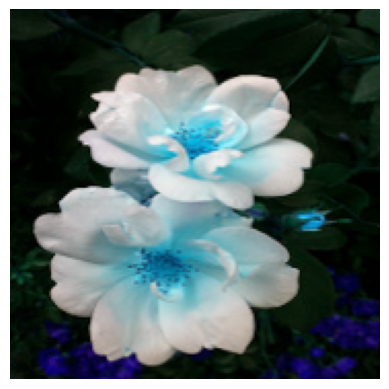

In [42]:
plt.axis("off")
plt.imshow(X[0])
plt.show()

In [43]:
data_augumentation = keras.layers.experimental.preprocessing.RandomZoom(0.5)

In [44]:
data_augumentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 7.0102987, 16.381958 ,  6.9396095],
        [ 7.818991 , 17.759655 ,  8.100919 ],
        [ 8.825029 , 19.961655 ,  7.9897037],
        ...,
        [22.046726 , 39.559433 , 23.982243 ],
        [20.971378 , 37.97636  , 22.287956 ],
        [18.300983 , 34.934475 , 19.054928 ]],

       [[13.655206 , 25.224047 , 12.775824 ],
        [13.896442 , 26.268547 , 13.096217 ],
        [12.858437 , 27.750252 , 11.890048 ],
        ...,
        [20.681479 , 39.40559  , 22.008724 ],
        [19.123653 , 37.647987 , 20.647984 ],
        [17.12561  , 35.32157  , 18.321571 ]],

       [[18.154575 , 31.039995 , 17.154575 ],
        [18.54168  , 31.510067 , 17.54168  ],
        [18.338776 , 30.075195 , 16.554808 ],
        ...,
        [19.885422 , 38.10145  , 24.44023  ],
        [19.21267  , 37.936775 , 23.104471 ],
        [19.283552 , 37.333645 , 20.831963 ]],

       ...,

       [[ 4.3259873,  3.3224132, 48.5229   ],
        [ 1.2

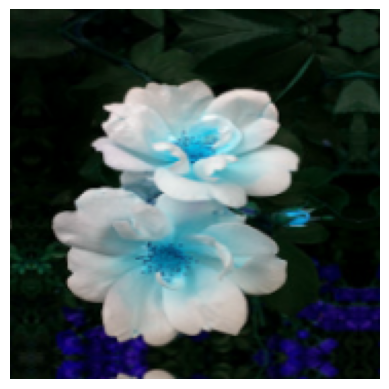

In [45]:
plt.axis("off")
plt.imshow(data_augumentation(X)[0].numpy().astype('uint8'))
plt.show()

In [46]:
data_augumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.5),
])

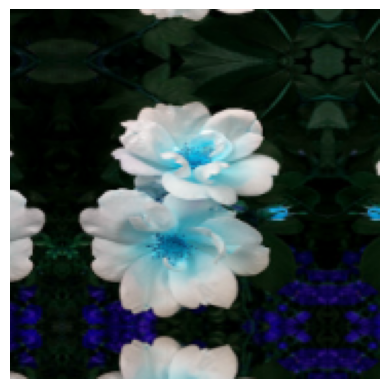

In [49]:
# plt.axis('off')
# plt.imshow(data_augumentation(x)[0].numpy()).astype('uint8')
# plt.show()
image = data_augumentation(X)[0].numpy().astype('uint8')

plt.axis('off')
plt.imshow(image)
plt.show()

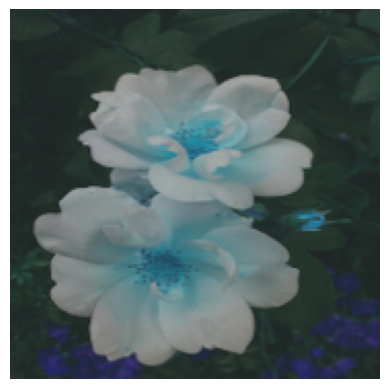

In [51]:
data_augumentation = keras.layers.experimental.preprocessing.RandomContrast(0.5)
plt.axis('off')
plt.imshow(data_augumentation(X)[0].numpy().astype('uint8'))
plt.show()

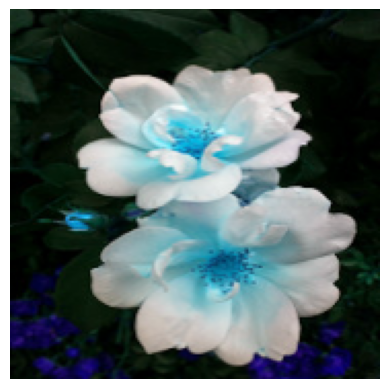

In [53]:
data_augumentation = keras.layers.experimental.preprocessing.RandomFlip('horizontal')
plt.axis('off')
plt.imshow(data_augumentation(X)[0].numpy().astype('uint8'))
plt.show()

In [57]:
data_augumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
cnn = keras.Sequential([
    data_augumentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'3),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=2)

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

In [ ]:
cnn.fit(X_train,y_train,epochs=10,steps_per_epoch=50)

In [ ]:
cnn.evaluate(X_test,y_test)